In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Load dataset
df = pd.read_csv('Ayurveda Sheet - Sheet2.csv')

In [3]:
df.shape

(999, 77)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
# Remove columns where all rows contain 0
df = df.loc[:, (df != 0).any(axis=0)]

In [6]:
df.shape

(815, 76)

In [7]:
df.drop(['Dosha', 'Risk','prognosis'], axis=1, inplace=True)

In [8]:
df.head()

,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,Less_of_appetite,...,Painful urination,Frequent urge to urinate,Cloudy or strong-smelling urine,Pelvic pain,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Medicine
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Turmeric and honey mixture, Ginger tea, Black ..."


In [9]:
df.isnull().sum()

Sneezing            0
Runny_Nose          0
Headache            0
High Fever          0
Bodyache            0
                   ..
Sweating            0
Hair loss           0
Photosensitivity    0
Oral ulcers         0
Medicine            3
Length: 73, dtype: int64

In [10]:
# Remove rows with missing data in the 'Medice' column
df = df.dropna(subset=['Medicine'])

In [11]:
############### Label Encode the data ####################
Encode_df = LabelEncoder()

In [12]:
df['Medicine'] = Encode_df.fit_transform(df['Medicine'])

In [13]:
mapping = dict(zip(Encode_df.classes_, Encode_df.transform(Encode_df.classes_)))
print(mapping)

{'Aloe vera extract, Coriander Water, King Coconut, Bee Honey': 0, 'Anis_Coriander_Garlic_Pepper boiled water drink, Heat Therapy, Hot bundle massage, Oil Application': 1, 'Anise Water, Coriander Water': 2, 'Apply cold pads on closed eyelids (Can use Aloevera Jell)': 3, 'Bitter gourd juice,Cinnamon water': 4, 'Boiled unripe papaya, marmelos juice, Eat immature and Soft king coconut shell, Oats Porridge, King Coconut Water, Boiled Barley, Fresh Milk with Sugar, Hathawariya Tea, Ginger_Lime Extract with Bee Honey, Rice Porridge, Anise Water, Aloe vera Juice, Coriander Water, Gee': 5, 'Caster Oil, Aloe vera Juice, Marmelos Juice or Extract, Avocado, Boiled unripe papaya, Sit in a Salty hot Water Bath': 6, 'Cranberry juice, Coriander seed water, Barley water, Coconut water': 7, 'Garlic and Pepper boiled drink, oil Massage, Heat Therapy, Bundle Massage': 8, 'Garlic and Pepper boiled drink, oil Massage, Heat Therapy, Bundle Massage, Cobra Yoga asana': 9, 'Garlic and Pepper boiled drink, oil 

In [14]:
df[['Medicine']].head()

,Medicine
0,45
1,45
4,45
5,45
8,45


In [15]:
df['Medicine'].value_counts(ascending=True)

Medicine
20     1
12     1
42     1
39     1
41     1
27     1
35     1
0      1
6      1
34     1
2      1
3      1
24     1
18     2
28     2
8      2
48     2
32     3
31     3
19     3
16     4
1      4
40     4
9      5
22     6
25     6
30     9
44    11
43    12
15    12
17    14
33    18
5     19
21    21
38    21
26    23
46    25
36    28
11    32
7     32
47    32
23    40
37    41
13    42
10    52
14    54
4     55
29    64
45    96
Name: count, dtype: int64

In [16]:
class_counts = df['Medicine'].value_counts()

In [17]:
dfs_concat = []

In [18]:
for class_label, count in class_counts.items():
    if count < 10:
        dfs_concat.append(df[df['Medicine'] == class_label])
    else:

        dfs_concat.append(df[df['Medicine'] == class_label].sample(10))

In [19]:
testing_df = pd.concat(dfs_concat)

In [20]:
if len(testing_df) < 300:
    additional_samples_needed = 300 - len(testing_df)
    remaining_data = df.drop(testing_df.index)
    additional_samples = remaining_data.sample(additional_samples_needed)
    testing_df = pd.concat([testing_df, additional_samples])

In [21]:
testing_df.reset_index(drop=True, inplace=True)

In [22]:
testing_df.head()

,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,Less_of_appetite,...,Painful urination,Frequent urge to urinate,Cloudy or strong-smelling urine,Pelvic pain,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Medicine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45


In [23]:
testing_df['Medicine'].value_counts()

Medicine
45    12
14    12
23    12
36    12
7     11
47    11
29    11
13    11
10    10
5     10
44    10
15    10
43    10
17    10
33    10
26    10
21    10
38    10
46    10
11    10
4     10
37    10
30     9
22     6
25     6
9      5
1      4
40     4
16     4
32     3
31     3
19     3
18     2
48     2
28     2
8      2
24     1
20     1
27     1
35     1
42     1
39     1
12     1
3      1
34     1
2      1
6      1
41     1
0      1
Name: count, dtype: int64

In [24]:
testing_df.shape

(300, 73)

In [25]:
X_train = df.drop(['Medicine'], axis=1)
y_train = df['Medicine']
##############################################
X_test = testing_df.drop('Medicine', axis=1)
y_test = testing_df['Medicine']

In [26]:
RF_model = RandomForestClassifier(random_state=42)

In [27]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = RF_model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [30]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9633333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00        11
           8       0.50      1.00      0.67         2
           9       1.00      0.40      0.57         5
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        12
          15       0.64      0.90      0.75        10
          16       1.00      

In [31]:
cm = confusion_matrix(y_test, y_pred)

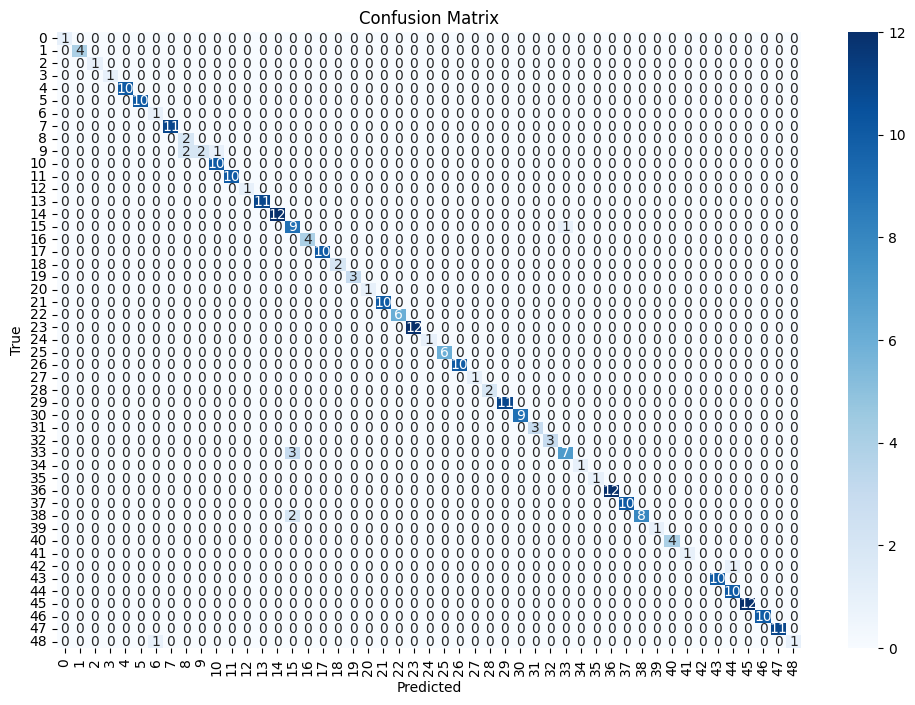

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=RF_model.classes_, yticklabels=RF_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(RF_model, file)